In [4]:
from gurobipy import *
import numpy as np
import time
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd


# Problema 1

In [6]:
#Abrir un archivo excel
import pandas as pd

#como leer un archivo .csv
data = pd.read_csv('clientes2.csv', sep=';')
print(data)


            x         y   demanda
0      7,9744  -11,3045   147,199
1    -13,6786   -3,3825   161,327
2     -8,8032  -10,3279  172,4834
3    -15,3621    9,4144  133,8201
4     -9,0891   -7,9311  129,8221
..        ...       ...       ...
995   -6,2143    -10,86  155,4059
996  -11,7203   -2,1472  132,1921
997    6,4149    7,9825  126,1607
998    5,9054   12,7097  156,3924
999   -9,4583   -7,1544  141,3835

[1000 rows x 3 columns]


## Pre-procesamiento

In [7]:
for i in range(len(data)):
    for j in range(len(data.columns)):
        valor = data.iloc[i,j]
        valor = valor.replace(",",".")
        data.iloc[i,j] = valor
data = data.applymap(float)

# data = data.iloc[0:100]
print(data)

           x        y   demanda
0     7.9744 -11.3045  147.1990
1   -13.6786  -3.3825  161.3270
2    -8.8032 -10.3279  172.4834
3   -15.3621   9.4144  133.8201
4    -9.0891  -7.9311  129.8221
..       ...      ...       ...
995  -6.2143 -10.8600  155.4059
996 -11.7203  -2.1472  132.1921
997   6.4149   7.9825  126.1607
998   5.9054  12.7097  156.3924
999  -9.4583  -7.1544  141.3835

[1000 rows x 3 columns]


/var/folders/6g/y899trsx4b11515s7wry35kh0000gn/T/ipykernel_17230/2553919280.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(float)


### Pregunta 1

Programar una función que reciba un centro aleatorio (x,y) y un conjunto de datos de clientes con sus pesos. Definiendo como método de detención que la diferencia de coordenadas entre iteraciones no sea mayor que 1*10^-5. El algoritmo debe reportar la ubicación óprima, el tiempo de ejecución y el número de iteraciones realizadas para encontrar el óptimo

In [13]:
import random
import time

def centro_euclidiano(x=0, y=0, data=0, logs = True):
    
    data = data.reset_index(drop=True)
    
    x_new = x+1
    y_new = y+1

    x_i = data.iloc[:,0]
    y_i = data.iloc[:,1]
    pesos = data.iloc[:,2]
    contador = 0
    time_0 = time.time()
    while (abs(x-x_new)>0.00001 and abs(y-y_new)>0.00001):
        contador += 1
        sum = 0
        sum_new_x = 0
        sum_g_i = 0
        sum_new_y = 0
        for i in range(len(data)):
        
            distancia = ((x-float(x_i[i]))**2+(y-float(y_i[i]))**2)**(1/2)
            fx = float(pesos[i])*distancia
            sum += fx
            
            g_i= (pesos[i]/distancia)
            
            sum_new_x += (x_i[i]*g_i)
            sum_new_y += (y_i[i]*g_i)
            sum_g_i += g_i
            time_n = time.time()
            
        x, y = x_new, y_new
        x_new = sum_new_x/sum_g_i
        y_new = sum_new_y/sum_g_i
        tiempo = time_n-time_0
    if logs:
        print(f'El modelo de localización arrojó las coordenadas x: {x_new} y: {y_new}')
        print(f'El modelo se demoró un tiempo de {tiempo} segundos y {contador} iteraciones')
    return x_new, y_new, tiempo, contador


x=random.randint(-2,2)
y=random.randint(-2,2)
posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data)

    

El modelo de localización arrojó las coordenadas x: -2.1911576964434 y: -4.507444623174453
El modelo se demoró un tiempo de 1.469161033630371 segundos y 36 iteraciones


### Pregunta 1.2
Usando los datos de 'clientes2.csv' y tomando una muestra de 250 clientes al azar, realice 100 repeticiones del algoritmo partiendo desde distintos puntos aleatorios. Reporte los estadísticos básicos (media, desviación, gráfico box plot) para los tiempos de ejecución y número de iteraciones

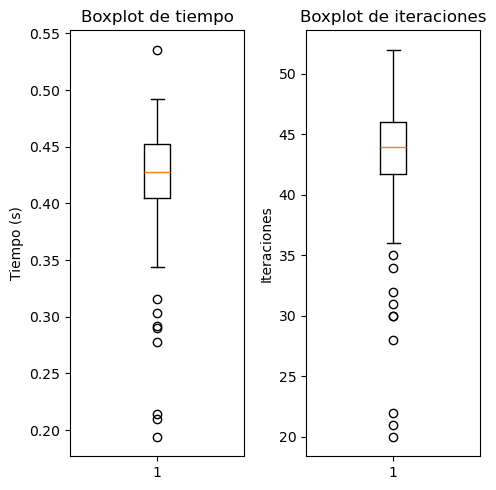

                x           y      tiempo  iteraciones
count  100.000000  100.000000  100.000000   100.000000
mean    -0.786343   -4.519675    0.417449    42.540000
std      0.016609    0.002107    0.058466     5.915943
min     -0.813148   -4.539846    0.193978    20.000000
25%     -0.788639   -4.519557    0.404730    41.750000
50%     -0.787772   -4.519492    0.427268    44.000000
75%     -0.787250   -4.519383    0.452651    46.000000
max     -0.627622   -4.516431    0.535604    52.000000
           x         y    tiempo  iteraciones
0  -0.787694 -4.519502  0.535604         52.0
1  -0.787816 -4.519486  0.467101         46.0
2  -0.787617 -4.519511  0.471007         46.0
3  -0.764345 -4.522427  0.278050         28.0
4  -0.801573 -4.517713  0.210048         21.0
..       ...       ...       ...          ...
95 -0.788126 -4.519448  0.425333         43.0
96 -0.788178 -4.519441  0.458155         45.0
97 -0.788205 -4.519438  0.443728         45.0
98 -0.788542 -4.519395  0.388533         40.0

In [14]:
import matplotlib.pyplot as plt

data_sample = data.sample(n=250)


max_value_x = round(data_sample.iloc[:,0].max())
min_value_x = round(data_sample.iloc[:,0].min())
max_value_y = round(data_sample.iloc[:,1].max())
min_value_y = round(data_sample.iloc[:,1].min())

df_estadisticos = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x,max_value_x)
    y=random.randint(min_value_y,max_value_y)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_sample, logs=False)
    df_estadisticos.loc[i] = [posx, posy, tiempo, iteraciones]
    

fig, axes = plt.subplots(1,2,figsize=(5,5))

axes[0].boxplot(df_estadisticos['tiempo'])
axes[0].set_title('Boxplot de tiempo')
axes[0].set_ylabel('Tiempo (s)')

axes[1].boxplot(df_estadisticos['iteraciones'])
axes[1].set_title('Boxplot de iteraciones')
axes[1].set_ylabel('Iteraciones')

plt.tight_layout()

plt.show()

print(df_estadisticos.describe())
print(df_estadisticos)


### Pregunta 1.3
Repita la parte 1.2 pero ahora usando distinta cantidad de clientes. Tome un subconjunto de los clientes del archivo y repita el experimento con los primeros 50, 100, 500, 1000 clientes de la base. Compare en un gráfico los distintos boxplot, tanto para los tiempos de ejecución como número de iteraciones. Explique el resultado

In [15]:
# Preguntar si es que son LOS PRIMEROS o si es que hay que sacar una muestra al azar de tamaño 50, 100 o 500

data_50 = data.iloc[0:50]
data_100 = data.iloc[0:100]
data_500 = data.iloc[0:500]


###### Para los primeros 50 ######

max_value_x_50 = round(data_50.iloc[:,0].max())
min_value_x_50 = round(data_50.iloc[:,0].min())
max_value_y_50 = round(data_50.iloc[:,1].max())
min_value_y_50 = round(data_50.iloc[:,1].min())

df_estadisticos_50 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x_50,max_value_x_50)
    y=random.randint(min_value_y_50,max_value_y_50)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_50, logs=False)
    df_estadisticos_50.loc[i] = [posx, posy, tiempo, iteraciones]

###### Para los primeros 100 ######

max_value_x_100 = round(data_100.iloc[:,0].max())
min_value_x_100 = round(data_100.iloc[:,0].min())
max_value_y_100 = round(data_100.iloc[:,1].max())
min_value_y_100 = round(data_100.iloc[:,1].min())

df_estadisticos_100 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x_100,max_value_x_100)
    y=random.randint(min_value_y_100,max_value_y_100)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_100, logs=False)
    df_estadisticos_100.loc[i] = [posx, posy, tiempo, iteraciones]


###### Para los primeros 500 ######

max_value_x_500 = round(data_500.iloc[:,0].max())
min_value_x_500 = round(data_500.iloc[:,0].min())
max_value_y_500 = round(data_500.iloc[:,1].max())
min_value_y_500 = round(data_500.iloc[:,1].min())

df_estadisticos_500 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x_500,max_value_x_500)
    y=random.randint(min_value_y_500,max_value_y_500)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_500, logs=False)
    df_estadisticos_500.loc[i] = [posx, posy, tiempo, iteraciones]
    
    
###### Para los primeros 1000 ######

max_value_x_1000 = round(data.iloc[:,0].max())
min_value_x_1000 = round(data.iloc[:,0].min())
max_value_y_1000 = round(data.iloc[:,1].max())
min_value_y_1000 = round(data.iloc[:,1].min())

df_estadisticos_1000 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x,max_value_x)
    y=random.randint(min_value_y,max_value_y)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data, logs=False)
    df_estadisticos_1000.loc[i] = [posx, posy, tiempo, iteraciones]
    
print(df_estadisticos_50.describe(), df_estadisticos_100.describe(), df_estadisticos_500.describe(), df_estadisticos_1000.describe())


                x           y      tiempo  iteraciones
count  100.000000  100.000000  100.000000   100.000000
mean    -3.262839   -6.729225    0.075096    37.270000
std      0.005730    0.002248    0.011224     5.622565
min     -3.315282   -6.733030    0.031687    16.000000
25%     -3.262635   -6.729475    0.070513    34.000000
50%     -3.262404   -6.729426    0.076780    38.000000
75%     -3.262198   -6.729369    0.080697    40.000000
max     -3.246610   -6.707551    0.102234    52.000000                 x           y      tiempo  iteraciones
count  100.000000  100.000000  100.000000   100.000000
mean    -3.986235   -5.045705    0.128948    32.420000
std      0.003348    0.001857    0.018830     4.707999
min     -4.012081   -5.048661    0.062853    16.000000
25%     -3.986392   -5.046082    0.122502    30.000000
50%     -3.986288   -5.046053    0.133363    34.000000
75%     -3.986053   -5.045937    0.141281    36.000000
max     -3.972765   -5.028867    0.163873    42.000000           

In [16]:
print(data_50.describe(), '\n', data_100.describe(), '\n', data_500.describe(), '\n', data.describe())

               x          y     demanda
count  50.000000  50.000000   50.000000
mean   -1.175942  -4.911742  149.108546
std    10.069588   9.525324   26.757517
min   -15.362100 -18.073700  100.810500
25%    -9.701200 -11.819600  130.482700
50%    -5.417400  -8.166550  147.822350
75%     7.643625   1.209575  166.226875
max    14.676400  15.738300  211.439200 
                 x           y     demanda
count  100.000000  100.000000  100.000000
mean    -1.171814   -3.897002  149.750156
std      9.934664    9.149004   28.210610
min    -16.366900  -18.073700   90.171200
25%     -9.625725  -10.506300  130.080475
50%     -4.593350   -6.830850  147.822350
75%      7.521700    1.278500  170.862175
max     16.912300   15.738300  211.439200 
                 x           y     demanda
count  500.000000  500.000000  500.000000
mean     0.036199   -3.627976  149.941302
std     10.775372    8.973269   29.982003
min    -21.457700  -21.626700   65.764500
25%    -10.002200  -10.579075  128.735550
50%   

### Graficamos los resultados

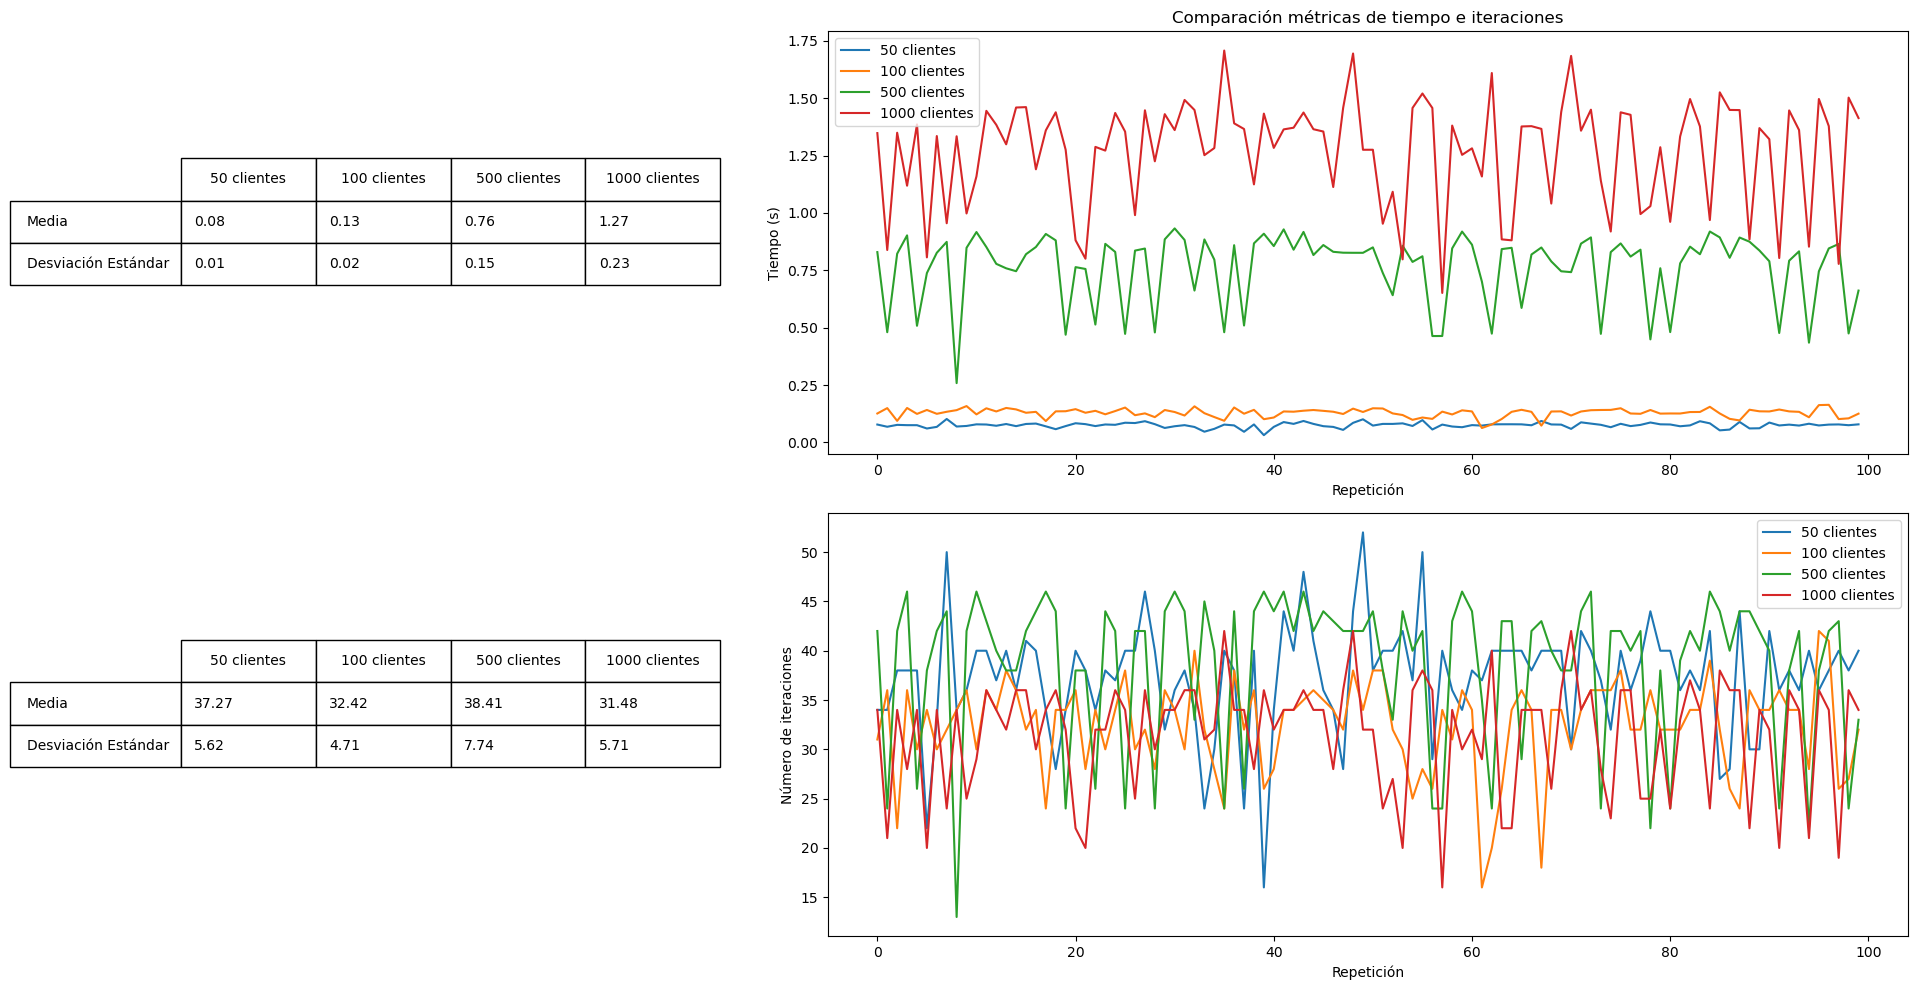

In [17]:

###### Gráfico de comparaciones de tiempos ######

metricas_tiempo = {
    'Media': [df_estadisticos_50['tiempo'].mean(), df_estadisticos_100['tiempo'].mean(), df_estadisticos_500['tiempo'].mean(), df_estadisticos_1000['tiempo'].mean()],
    'Desviación Estándar' : [df_estadisticos_50['tiempo'].std(), df_estadisticos_100['tiempo'].std(), df_estadisticos_500['tiempo'].std(), df_estadisticos_1000['tiempo'].std()],
}


fig, axes = plt.subplots(2,1,figsize=(20,10))

axes[0].plot(df_estadisticos_50['tiempo'], label='50 clientes')
axes[0].plot(df_estadisticos_100['tiempo'], label='100 clientes')
axes[0].plot(df_estadisticos_500['tiempo'], label='500 clientes')
axes[0].plot(df_estadisticos_1000['tiempo'], label='1000 clientes')

axes[0].set_title('Comparación métricas de tiempo e iteraciones')
axes[0].set_xlabel('Repetición')
axes[0].set_ylabel('Tiempo (s)')

axes[0].legend()

table_data_tiempo = [[f'{metrica:.2f}' for metrica in metricas_tiempo[stat]] for stat in metricas_tiempo]
columns = ['50 clientes', '100 clientes', '500 clientes', '1000 clientes']
rows = ['Media', 'Desviación Estándar']

axes[0].table(cellText = table_data_tiempo,rowLabels=rows, colLabels=columns, cellLoc = 'left', loc='left', bbox = [-0.6, 0.4, 0.5, 0.3])

###### Gráfico de comparaciones de iteraciones ######

metricas_iteraciones = {
    'Media': [df_estadisticos_50['iteraciones'].mean(), df_estadisticos_100['iteraciones'].mean(), df_estadisticos_500['iteraciones'].mean(), df_estadisticos_1000['iteraciones'].mean()],
    'Desviación Estándar' : [df_estadisticos_50['iteraciones'].std(), df_estadisticos_100['iteraciones'].std(), df_estadisticos_500['iteraciones'].std(), df_estadisticos_1000['iteraciones'].std()],
}

axes[1].plot(df_estadisticos_50['iteraciones'], label='50 clientes')
axes[1].plot(df_estadisticos_100['iteraciones'], label='100 clientes')
axes[1].plot(df_estadisticos_500['iteraciones'], label='500 clientes')
axes[1].plot(df_estadisticos_1000['iteraciones'], label='1000 clientes')

axes[1].set_xlabel('Repetición')
axes[1].set_ylabel('Número de iteraciones')

axes[1].legend()

table_data_iteraciones = [[f'{metrica:.2f}' for metrica in metricas_iteraciones[stat]] for stat in metricas_tiempo]
columns = ['50 clientes', '100 clientes', '500 clientes', '1000 clientes']
rows = ['Media', 'Desviación Estándar']

axes[1].table(cellText = table_data_iteraciones,rowLabels=rows, colLabels=columns, cellLoc = 'left', loc='left', bbox = [-0.6, 0.4, 0.5, 0.3])


plt.subplots_adjust(left=0.3, bottom=0.2, hspace=0.5, wspace=0.5)
plt.tight_layout()

plt.show()


## Resultados

### Comparación en tiempo

Los resultados revelan que a medida que tenemos más datos siendo procesados por el algoritmo, va aumentando el costo en tiempo e incluso decir que podría tener un costo que va aumentando de manera casi exponencial, esto se explica ya que, como se pidió en la pregunta 1.2, hay que realizar 100 repeticiones para cada muestra requerida, lo que significa que para las muestras más pequeñas, repetir el proceso 100 veces no va a significar un impacto tan grande como lo es el repetir el proceso para las muestras más grandes, otro factor que también tiene un impacto no menor, es el hecho de que las coordenadas iniciales son puntos al azar, para este problema las coordenadas iniciales son puntos dentro de un rango, este rango corresponde a los mínimos y máximos obtenidos dentro de cada muestra, debido a este factor se podría explicar que la desviación estándar para cada muestra no es tan grande y que aumenta a medida que va creciendo el tamaño de la muestra, a medida que aumenta el número de clientes, los mínimos se van alejando cada vez más de los máximos

### Pregunta 1.4
Para el caso de 1000 clientes. Vamos a comparar el método anterior pero eligiendo un buen punto de partida, no al azar como antes. Use el método de distancia cuadrática como solución para el punto de partida. Reporte el tiempo y el número de iteraciones. ¿Por que este resultado es mejor? 


In [18]:
## Calculamos las coordenadas iniciales con el método de distancia cuadrática ##

# Como vamos a calcularlo solo para el caso de 1000 clientes, podemos calcular las coordenadas iniciales usando el df completo afuera de la función de centro euclidiano

sum_pesos = data.iloc[:,2].sum()

print(sum_pesos)

den_x = 0  
den_y = 0

for i in range(len(data)):
    den_x += (data.iloc[i,0]*data.iloc[i,2])
    den_y += (data.iloc[i,1]*data.iloc[i,2])

print(den_x, den_y)

x_inicial = den_x/sum_pesos
y_inicial = den_y/sum_pesos

print(x_inicial, y_inicial)

df_estadisticos = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    
    posx, posy, tiempo, iteraciones = centro_euclidiano(x_inicial, y_inicial, data, logs=False)
    df_estadisticos.loc[i] = [posx, posy, tiempo, iteraciones]


df_estadisticos.describe()

150868.5339
-586.0032229500265 -532996.14560778
-0.0038841977700827014 -3.5328516280344124


,x,y,tiempo,iteraciones
count,1.000000e+02,1.000000e+02,100.000000,100.0
mean,-2.190571e+00,-4.507432e+00,1.458738,36.0
std,4.463264e-15,5.355917e-15,0.022716,0.0
min,-2.190571e+00,-4.507432e+00,1.400173,36.0
25%,-2.190571e+00,-4.507432e+00,1.443548,36.0
50%,-2.190571e+00,-4.507432e+00,1.461787,36.0
75%,-2.190571e+00,-4.507432e+00,1.475139,36.0
max,-2.190571e+00,-4.507432e+00,1.519095,36.0


## Problema 1.5

In [29]:
# Crear el modelo de optimización con Gurobi
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import pandas as pd
import time
modelo= gp.Model("Modelo 1.5")

# Variables de decisión: Coordenadas x_i y y_i (son continuas)
x_i = modelo.addVar(vtype=GRB.CONTINUOUS, name="x_i", lb=-GRB.INFINITY, ub=GRB.INFINITY)
y_i = modelo.addVar(vtype=GRB.CONTINUOUS, name="y_i", lb=-GRB.INFINITY, ub=GRB.INFINITY)


# Función objetivo: Minimizar la suma ponderada de las distancias cuadráticas
modelo.setObjective(gp.quicksum(data.iloc[i, 2] * ((x_i - data.iloc[i, 0])**2 + (y_i - data.iloc[i, 1])**2) for i in range(1000)), GRB.MINIMIZE)


# Medir el tiempo de optimización
start_time = time.time()
modelo.optimize()
end_time = time.time()

# Obtener resultados: tiempo de ejecución, número de iteraciones, y solución óptimo
if modelo.status == GRB.OPTIMAL:
    print(modelo.ObjVal)
    tiempo_ejecucion = end_time - start_time
    iteraciones = modelo.itercount  # Número de iteraciones
    x_optimo = x_i.X
    y_optimo = y_i.X
    valor_objetivo = modelo.ObjVal

    # Mostrar los resultados
    print("Solución óptima:",(x_i.x,y_i.x))
    print(f"Valor óptimo de la función objetivo: {valor_objetivo}")
    print(f"Número de iteraciones: {iteraciones}")
    print(f"Tiempo de ejecución: {tiempo_ejecucion} segundos")
else:
    print("No se encontró una solución óptima.")



Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 23.6.0 23G93)

CPU model: Apple M3 Pro
Thread count: 11 physical cores, 11 logical processors, using up to 11 threads

Optimize a model with 0 rows, 2 columns and 0 nonzeros
Model fingerprint: 0x11ba164e
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [1e+03, 1e+06]
  QObjective range [3e+05, 3e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 0 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective 2.85804872e+07
28580487.19069732
Solución óptima: (-0.0038841977700825657, -3.5328516280344155)
Valor óptimo de la función objetivo: 28580487.19069732
Número de iteraciones: 0.0
Tiempo de ejecución: 0.0073931217193603516 segundos


In [17]:
from gurobipy import Model, GRB
import numpy as np

modelo = Model('Centros de distribución')

# Definimos las variables
x = modelo.addVar(vtype=GRB.CONTINUOUS, name='x')
y = modelo.addVar(vtype=GRB.CONTINUOUS, name='y')

# Definimos la función objetivo
objetivo = 0
for i in range(len(data)):
    x_i = data.iloc[i,0]
    y_i = data.iloc[i,1]
    w_i = data.iloc[i,2]
    objetivo += w_i*((x-x_i)**2 + (y-y_i)**2)
    
modelo.setObjective(objetivo, GRB.MINIMIZE)

x_min, x_max = data.iloc[:,0].min(), data.iloc[:,0].max()
y_min, y_max = data.iloc[:,1].min(), data.iloc[:,1].max()

modelo.addConstr(x >= x_min, "x_min")
modelo.addConstr(x <= x_max, "x_max")
modelo.addConstr(y >= y_min, "y_min")
modelo.addConstr(y <= y_max, "y_max")


modelo.optimize()

if modelo.status == GRB.OPTIMAL:
    print(f'La solución óptima es x={x.X} y={y.X}')
    print(f"El tiempo de ejecución fue de {modelo.Runtime} segundos")
    print(f"El número de iteraciones fue de {modelo.IterCount}")
else:
    print("El modelo no encontró solución óptima")

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 23.6.0 23G93)

CPU model: Apple M3 Pro
Thread count: 11 physical cores, 11 logical processors, using up to 11 threads

Optimize a model with 4 rows, 2 columns and 4 nonzeros
Model fingerprint: 0x80588e97
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+03, 1e+06]
  QObjective range [3e+05, 3e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 2e+01]
Presolve removed 4 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective 3.04634858e+07
La solución óptima es x=0.0 y=0.0
El tiempo de ejecución fue de 0.004757881164550781 segundos
El número de iteraciones fue de 0.0


In [45]:
#INTENTO PAO

modelo1 = Model('Centros de distribución')


n = len(data)
valores_N = list(range(1,n+1))

conjunto_N= [i for i in valores_N]


#Definimos las variables
x = modelo1.addVar(vtype= GRB.CONTINUOUS , name = "x")
y = modelo1.addVar(vtype= GRB.CONTINUOUS , name = "y")

matriz_w = np.zeros((1,n))
for i in range(n):
    matriz_w[0,i]=data.iloc[i, 2]

modelo1.setObjective(quicksum(matriz_w[0, i-1]*((x-data.iloc[i-1,0])**2 + (y-data.iloc[i-1,1])**2) for i in conjunto_N), GRB.MINIMIZE)

modelo1.addConstr(x >= x_min, "x_min")
modelo1.addConstr(x <= x_max, "x_max")
modelo1.addConstr(y >= y_min, "y_min")
modelo1.addConstr(y <= y_max, "y_max")

modelo1.optimize()



print(f"los costos mínimos totales son {modelo1.ObjVal}")

print(modelo1.getVars())

if modelo1.status == GRB.OPTIMAL:
    print(f'La solución óptima es x={x.X} y={y.X}')
    print(f"El tiempo de ejecución fue de {modelo1.Runtime} segundos")
    print(f"El número de iteraciones fue de {modelo1.IterCount}")
else:
    print("El modelo no encontró solución óptima")

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[rosetta2] - Darwin 23.6.0 23G93)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4 rows, 2 columns and 4 nonzeros
Model fingerprint: 0x80588e97
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+03, 1e+06]
  QObjective range [3e+05, 3e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 2e+01]
Presolve removed 4 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective 3.04634858e+07
los costos mínimos totales son 30463485.767596245
[<gurobi.Var x (value 0.0)>, <gurobi.Var y (value 0.0)>]
La solución óptima es x=0.0 y=0.0
El tiempo de ejecución fue de 0.0036461353302001953 segundos
El número de iteraciones fue de 0.0


In [47]:
x_opt = modelo.addVar(vtype=GRB.CONTINUOUS, name="x_opt")
y_opt = modelo.addVar(vtype=GRB.CONTINUOUS, name="y_opt")

# Parámetros del problema (coordenadas y pesos)
x_i = data['x'].tolist()
y_i = data['y'].tolist()
w_i = data['demanda'].tolist()

# Definimos la función objetivo: Minimizar la distancia cuadrática ponderada
objetivo = gp.quicksum(w_i[i] * ((x_opt - x_i[i])**2 + (y_opt - y_i[i])**2) for i in range(len(x_i)))

# Establecemos la función objetivo en el modelo
modelo.setObjective(objetivo, GRB.MINIMIZE)

# Optimizamos el modelo
modelo.optimize()

# Imprimimos los resultados si la solución es óptima
if modelo.status == GRB.OPTIMAL:
    print(f'La solución óptima es x_opt={x_opt.X} y_opt={y_opt.X}')
    print(f"El tiempo de ejecución fue de {modelo.Runtime} segundos")
    print(f"El número de iteraciones fue de {modelo.IterCount}")

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[rosetta2] - Darwin 23.6.0 23G93)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4 rows, 6 columns and 4 nonzeros
Model fingerprint: 0x821770e0
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+03, 1e+06]
  QObjective range [3e+05, 3e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 2e+01]
Presolve removed 4 rows and 6 columns
Presolve time: 0.02s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.04634858e+07
La solución óptima es x_opt=0.0 y_opt=0.0
El tiempo de ejecución fue de 0.02352285385131836 segundos
El número de iteraciones fue de 0.0


Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 23.6.0 23G93)

CPU model: Apple M3 Pro
Thread count: 11 physical cores, 11 logical processors, using up to 11 threads

Optimize a model with 0 rows, 2 columns and 0 nonzeros
Model fingerprint: 0xdc7d4f47
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [3e+05, 3e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.00s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Unbounded model


AttributeError: Unable to retrieve attribute 'X'

# Problema 2

## a)
### Parámetros: 

$$ C_{ij} \quad \text{es el costo de transportar un producto desde el centro} j \text{ al cliente } i \text{ (calculado usando distancia cuadrática y \$1 por km.)} $$
$$ d_{i} \quad \text{es la demanda del cliente } i \text{ en cantidad de productos }$$

### Variables de decisión:
$$ x_{ij} \quad \text{es el porcentaje de la demanda del cliente } i \text{ que es satisfecha por el centro } j. $$
$$ y_{j} \quad \text{es 1 si se instala el centro } j \text{ y 0 si no} $$

### Modelo:
$$
min  \left(\sum_{j=1}^m\  \sum_{i=1}^n\ C_ij * d_i * x_ij   \right) \\
$$

s.a.

$$
\sum_{j \in M} x_{ij} = 1 \quad \forall i \in N
$$
*Se debe satisfacer toda la demanda del cliente.*

$$
x_{ij} \leq y_j \quad \forall (i,j) \in N \times M
$$
*Un cliente solo puede ser asignado a un centro si el centro está abierto. (puede omitirse ya que se incluye en la restricción siguiente)*

$$
\sum_{i \in N} d_i \cdot x_{ij} \leq 50000 \cdot y_j \quad \forall j \in M
$$
*La demanda total asignada a un centro no debe exceder su capacidad.*

$$
\sum_{j \in M} y_j = 4
$$
*Debe haber exactamente 4 centros abiertos.*

$$
x_{ij} \leq 1 \quad \forall (i,j) \in N \times M
$$
*Garantiza que $x_{ij}$ no sea mayor a 1 ya que es un porcentaje.*

In [62]:
#IMPORTAMOS LOS DATOS Y LOS DEJAMOS EN EL FORMATO NECESARIO
data_centros = pd.read_csv('cd2.csv', sep=';')
data_centros.index = range(1, len(data_centros) + 1)

for i in range(len(data_centros)):
    for j in range(len(data_centros.columns)):
        valor = data_centros.iloc[i,j]
        valor = valor.replace(",",".")
        data_centros.iloc[i,j] = valor
data_centros = data_centros.applymap(float)

data_clientes = data
data_clientes.index = range(1, len(data_clientes) + 1)

In [16]:
# CREAMOS LAS MATRICES Y CONJUNTOS A UTILIZAR 
n = len(data_clientes)
valores_N = list(range(1,n+1))

m = len(data_centros) #cantidad de instalaciones
valores_M = list(range(1,m+1))


conjunto_N= [i for i in valores_N]
conjunto_M = [j for j in valores_M]
indices = [(i,j) for i in valores_N for j in valores_M]


np.random.seed(100)
matriz_c = np.zeros((n,m)) #costo transporte
for i in range(n):      # iterar sobre las filas (clientes)
    for j in range(m):  # iterar sobre las columnas (centros)
        matriz_c[i, j] = (((data_clientes.iloc[i,0]-data_centros.iloc[j,0])**2)+((data_clientes.iloc[i,1]-data_centros.iloc[j,1])**2))


matriz_d = np.zeros((1,n))
for i in range(n):
    matriz_d[0,i]=data_clientes.iloc[i, 2] #demanda clientes


matriz_c, matriz_d

(array([[169.63401578,  21.97835386, 610.30728569, ..., 324.78077561,
         776.96077561, 191.38277561],
        [173.60929378, 479.67869146,  20.93176089, ...,  57.32340421,
         192.62340421, 198.54540421],
        [ 23.50784938, 295.54838546,  67.72920125, ...,   1.53984865,
         414.65584865, 184.16184865],
        ...,
        [577.61332813, 215.58650521, 746.02490024, ..., 592.81924826,
         273.51924826, 104.87124826],
        [789.1013753 , 377.81414746, 887.86570093, ..., 768.71222325,
         260.32422325, 196.41022325],
        [ 57.4424596 , 304.48490144,  47.73363997, ...,   8.39087825,
         294.56687825, 140.64487825]]),
 array([[147.199 , 161.327 , 172.4834, 133.8201, 129.8221, 135.8759,
         137.4951, 116.0237, 176.0073, 182.5082, 211.4392, 178.8036,
         147.2486, 171.5791, 155.7654, 121.0729, 107.4977, 179.2488,
         116.026 , 185.2368, 146.0459, 109.2214, 151.6948, 190.958 ,
         137.9484, 114.0593, 106.5537, 132.4645, 147.1008, 14

In [17]:
#CREAMOS EL MODELO EN GUROBI

problema2 = Model("problema 2")

#Variables de decisión
x_ij = problema2.addVars(indices, vtype= GRB.CONTINUOUS, name = "x_ij")
y_j = problema2.addVars(conjunto_M, vtype= GRB.BINARY, name = "y_j")

#Función objetivo
problema2.setObjective(quicksum(matriz_c[i-1, j-1]*matriz_d[0,i-1]*x_ij[i,j] for (i,j) in indices), GRB.MINIMIZE) #+ quicksum(850*y_j[j] for j in conjunto_M), GRB.MINIMIZE)  #PREGUNTAR SI SE MINIMIZAN TODOS LOS COSTOS O SOLO DE TRANSPORTE

#Restricciones
problema2.addConstrs(quicksum(x_ij[i,j] for j in conjunto_M) == 1 for i in conjunto_N) #un centro para cada cliente  
problema2.addConstrs(x_ij[i,j] <= y_j[j] for (i,j) in indices)  #si no se hace el centro no se asigna cliente (creo que es redundante)
problema2.addConstrs(quicksum(matriz_d[0,i-1]*x_ij[i,j] for i in conjunto_N) <= 50000*y_j[j] for j in conjunto_M)  #suma de demandas menor a la capacidad del centro j
problema2.addConstr(quicksum(y_j[j] for j in conjunto_M) == 4)  #se deben hacer 4 centros
problema2.addConstrs(x_ij[i,j]<=1 for (i,j) in indices)

problema2.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-08-12
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[rosetta2] - Darwin 23.6.0 23G93)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 71036 rows, 35035 columns and 175070 nonzeros
Model fingerprint: 0x434231d4
Variable types: 35000 continuous, 35 integer (35 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+04]
  Objective range  [2e+00, 3e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 7.253640e+07
Presolve removed 35000 rows and 0 columns
Presolve time: 0.08s
Presolved: 36036 rows, 35035 columns, 140070 nonzeros
Variable types: 35000 continuous, 35 integer (35 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing primal log only...

Concurrent spin time: 0.07s

Solved with dual simplex

Root relaxation: objective 4.400097e+0

In [65]:
print(f"los costos mínimos totales son {problema2.ObjVal}")
costos_conins= problema2.ObjVal + 850 * 4

print(f"los costos mínimos totales incluyendo la instalación son {costos_conins}")

vars = problema2.getVars()

vars_x = vars[:-m]
variables_activas_x = [var for var in vars_x if var.x != 0]
#variables_activas_x

vars_y = vars[-m:]
variables_activas_y = [var for var in vars_y if var.x != 0]
#variables_activas_y



clientes_por_centro = defaultdict(list)
centros_j = set()

for var in variables_activas_x:
    var_name = var.VarName  # Obtiene el nombre de la variable
    # Extraer los índices i y j
    indices = var_name.split('[')[1].split(']')[0]  # Ejemplo: "1,5"
    i, j = map(int, indices.split(','))  # Divide "1,5" en [1, 5]
    
    # Agrupar i por j
    clientes_por_centro[j].append(i)
    centros_j.add(j)

centros_j = sorted(centros_j)

# Mostrar los resultados ordenados por el centro j
for j in sorted(clientes_por_centro):
    clientes = sorted(clientes_por_centro[j])  # Ordenar los clientes también
    print(f"En el centro {j} se atienden los clientes: {clientes}")



for centro in centros_j:
    print(f'El centro {centro} tiene la posición ({data_centros.iloc[centro-1,0]} , {data_centros.iloc[centro-1,1]})')

#Estos clientes no cumplen su demanda en un solo centro, sino que un porcentaje en cada uno
clientes_parciales = [var for var in vars_x if var.x != 0 and var.x != 1]
clientes_parciales


los costos mínimos totales son 4400097.33855695
los costos mínimos totales incluyendo la instalación son 4403497.33855695
En el centro 15 se atienden los clientes: [2, 4, 8, 13, 19, 26, 35, 46, 48, 50, 51, 52, 53, 57, 60, 63, 66, 68, 71, 72, 77, 78, 79, 80, 82, 90, 91, 95, 104, 110, 117, 130, 134, 140, 149, 163, 164, 169, 170, 171, 176, 180, 182, 183, 193, 200, 207, 209, 215, 224, 231, 238, 239, 240, 247, 255, 266, 271, 275, 278, 292, 294, 297, 300, 302, 304, 309, 314, 330, 331, 335, 336, 351, 354, 361, 362, 376, 379, 386, 390, 392, 393, 395, 399, 404, 405, 406, 409, 414, 415, 418, 420, 424, 435, 439, 443, 449, 457, 468, 478, 486, 489, 493, 496, 498, 503, 507, 510, 512, 523, 527, 531, 541, 542, 543, 547, 554, 559, 567, 576, 578, 582, 583, 591, 597, 598, 608, 617, 618, 621, 624, 627, 629, 632, 642, 644, 645, 647, 652, 654, 657, 663, 666, 669, 671, 673, 675, 679, 681, 683, 686, 690, 694, 697, 699, 701, 702, 711, 712, 713, 715, 721, 724, 729, 734, 736, 739, 741, 749, 750, 758, 763, 767, 7

[]

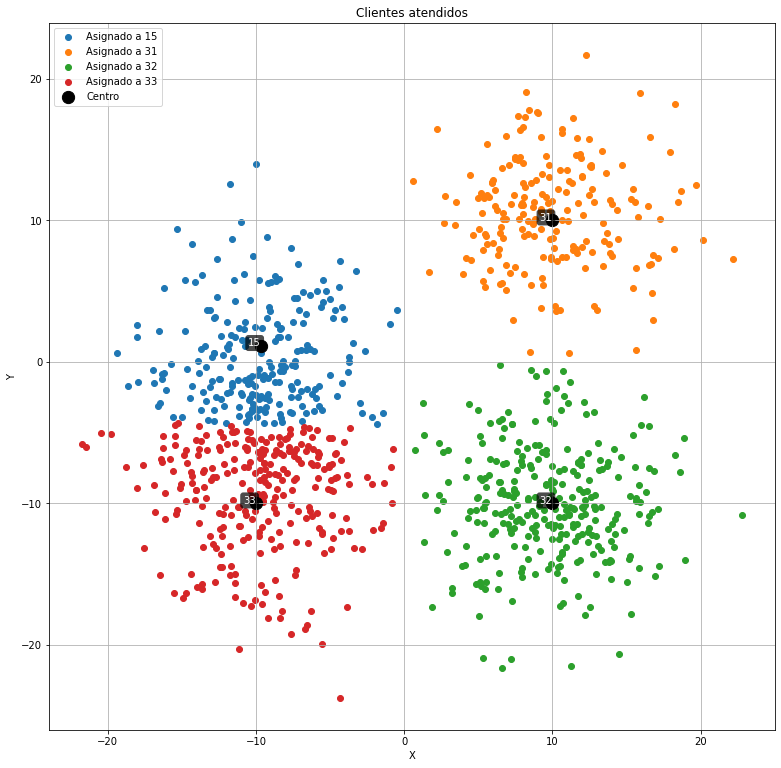

In [19]:
#### ESTE ARREGLO SOLO ES PARA GRAFICAR MÁS FÁCILMENTE ####
subsets = {}

indices_centros = [i - 1 for i in centros_j]
sub_centros = data_centros.iloc[indices_centros]

for idx, j in enumerate(centros_j):
    indices = [i - 1 for i in clientes_por_centro[j]] #para tener sus índices en el dataframe (formato que inicia en 0)
    
    subset = data_clientes.iloc[indices] #subset con coordenadas para graficar 
    
    subsets[f'sub{idx}'] = subset #guardamos en diccionario para acceder más fácilmente
    
####                                                   ####


plt.figure(figsize=(13, 13))

for idx in range(len(centros_j)):
    subset = subsets[f'sub{idx}']
    
    plt.scatter(subset['x'], subset['y'], label=f'Asignado a {centros_j[idx]}')



plt.scatter(sub_centros['x'], sub_centros['y'], color='black', s=150, label=f'Centro')

for idx in sub_centros.index:
    plt.text(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], f'{idx}', 
            fontsize=10, ha='right', color='white', 
            bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))


plt.title(f'Clientes atendidos')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
    

plt.show()

## b)
### Parámetros: 

$$ C_{ij} \quad \text{es el costo de transportar un producto desde el centro} j \text{ al cliente } i \text{ (calculado usando distancia cuadrática y \$1 por km.)} $$
$$ d_{i} \quad \text{es la demanda del cliente } i \text{ en cantidad de productos }$$

### Variables de decisión:
$$ x_{ij} \quad \text{es el porcentaje de la demanda del cliente } i \text{ que es satisfecha por el centro } j. $$
$$ p_{j} \quad \text{es 1 si el centro } j \text{ es pequeño y 0 si no} $$
$$ m_{j} \quad \text{es 1 si el centro } j \text{ es mediano y 0 si no} $$
$$ g_{j} \quad \text{es 1 si el centro } j \text{ es grande y 0 si no} $$

### Modelo:

$$
min  \left(\sum_{j=1}^m\ ( \sum_{i=1}^n\ C_ij * d_i * x_ij ) + 200*p_j +450*m_j + 850*g_j  \right) \\
$$

s.a.

$$
\sum_{j \in M} x_{ij} = 1 \quad \forall i \in N
$$
*Se debe satisfacer toda la demanda del cliente.*

$$
x_{ij} \leq p_j + m_j + g_j \quad \forall (i,j) \in N \times M
$$
*Un cliente solo puede ser asignado a un centro si el centro está abierto. (puede omitirse ya que se incluye en la restricción siguiente)*

$$
\sum_{i \in N} d_i \cdot x_{ij} \leq  10000 \cdot p_j + 25000 \cdot m_j + 50000 \cdot g_j\quad \forall j \in M
$$
*La demanda total asignada a un centro no debe exceder su capacidad.*

$$
\sum_{j \in M} y_j = 4
$$
*Debe haber exactamente 4 centros abiertos.*

$$
x_{ij} \leq 1 \quad \forall (i,j) \in N \times M
$$
*Garantiza que $x_{ij}$ no sea mayor a 1 ya que es un porcentaje.*

In [20]:
conjunto_N= [i for i in valores_N]
conjunto_M = [j for j in valores_M]
indices = [(i,j) for i in valores_N for j in valores_M]


problema2b = Model("problema 2b")

#Variables de decisión
x_ij = problema2b.addVars(indices, vtype= GRB.CONTINUOUS, name = "x_ij") #porcentaje en el que el cliente i se atiende en el centro j
p_j = problema2b.addVars(conjunto_M, vtype= GRB.BINARY, name = "p_j") #1 si el centro j se construye y es chico, 0 si no
m_j = problema2b.addVars(conjunto_M, vtype= GRB.BINARY, name = "m_j") #1 si el centro j se construye y es mediano, 0 si no
g_j = problema2b.addVars(conjunto_M, vtype= GRB.BINARY, name = "g_j") #1 si el centro j se construye y es grande, 0 si no

#Función objetivo
problema2b.setObjective(quicksum(matriz_c[i-1, j-1]*matriz_d[0,i-1]*x_ij[i,j] for (i,j) in indices) + quicksum((200*p_j[j])+(450*m_j[j])+(850*g_j[j]) for j in conjunto_M), GRB.MINIMIZE)  

#Restricciones
problema2b.addConstrs(quicksum(x_ij[i,j] for j in conjunto_M) == 1 for i in conjunto_N) #un centro para cada cliente  #PREGUNTAR SI UN CLIENTE TIENE 1 INSTALACIÓN O SI ES POR PORCENTAJE
problema2b.addConstrs(p_j[j] + m_j[j] + g_j[j] <= 1 for j in conjunto_M) #el centro puede ser o pequeño o mediano o grande (solo 1)
problema2b.addConstrs(x_ij[i,j] <= (p_j[j] + m_j[j] + g_j[j]) for (i,j) in indices)  #si no se hace el centro no se asigna cliente (creo que es redundante)
problema2b.addConstrs(quicksum(matriz_d[0,i-1]*x_ij[i,j] for i in conjunto_N) <= 10000*p_j[j] + 25000*m_j[j] + 50000*g_j[j] for j in conjunto_M)  #suma de demandas menor a la capacidad del centro j
problema2b.addConstrs(x_ij[i,j]<=1 for (i,j) in indices) #el porcentaje de atención es menor o igual a 1 (es un porcentaje)

problema2b.optimize()



Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[rosetta2] - Darwin 23.6.0 23G93)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 71070 rows, 35105 columns and 245210 nonzeros
Model fingerprint: 0x8a8ca9e5
Variable types: 35000 continuous, 105 integer (105 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+04]
  Objective range  [2e+00, 3e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 35000 rows and 0 columns
Presolve time: 0.13s
Presolved: 36070 rows, 35105 columns, 210210 nonzeros
Variable types: 35000 continuous, 105 integer (105 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing primal log only...

Concurrent spin time: 0.01s

Solved with dual simplex

Root relaxation: objective 1.258650e+06, 87 iterations, 0.08 seconds (0.08 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl 

In [66]:
print(f"los costos mínimos totales son {problema2b.ObjVal}")

m = len(data_centros)

vars = problema2b.getVars()

vars_x=[]
vars_p=[]
vars_m=[]
vars_g=[]

for var in vars:
    if var.VarName.startswith("x_"):
        vars_x.append(var)
    elif var.VarName.startswith("p_"):
        vars_p.append(var)
    elif var.VarName.startswith("m_"):
        vars_m.append(var)
    elif var.VarName.startswith("g_"):
        vars_g.append(var)

variables_activas_x = [var for var in vars_x if var.x != 0]
variables_activas_p = [var for var in vars_p if var.x != 0]
variables_activas_m = [var for var in vars_m if var.x != 0]
variables_activas_g = [var for var in vars_g if var.x != 0]


los costos mínimos totales son 1258865.7557536508


In [67]:
#Estos clientes no cumplen su demanda en un solo centro, sino que un porcentaje en cada uno
clientes_parciales = [var for var in vars_x if var.x != 0 and var.x != 1]
clientes_parciales

[<gurobi.Var x_ij[459,6] (value 0.5386718608849246)>,
 <gurobi.Var x_ij[459,26] (value 0.4613281391150754)>]

In [42]:
clientes_por_centro = defaultdict(list)
centros_j = set()

for var in variables_activas_x:
    var_name = var.VarName  # Obtiene el nombre de la variable
    # Extraer los índices i y j
    indices = var_name.split('[')[1].split(']')[0]  # Ejemplo: "1,5"
    i, j = map(int, indices.split(','))  # Divide "1,5" en [1, 5]
    
    # Agrupar i por j
    clientes_por_centro[j].append(i)
    centros_j.add(j)

centros_j = sorted(centros_j)

# Mostrar los resultados ordenados por el centro j
for j in sorted(clientes_por_centro):
    clientes = sorted(clientes_por_centro[j])  # Ordenar los clientes también
    print(f"En el centro {j} se atienden los clientes: {clientes}")

En el centro 1 se atienden los clientes: [22, 120, 165, 181, 221, 307, 312, 319, 389, 622, 656, 755, 929, 934]
En el centro 2 se atienden los clientes: [10, 17, 59, 86, 87, 96, 107, 116, 136, 159, 184, 190, 202, 208, 214, 228, 340, 345, 372, 391, 400, 401, 411, 427, 445, 463, 480, 481, 484, 488, 497, 499, 532, 556, 565, 566, 572, 584, 585, 587, 594, 596, 604, 628, 661, 664, 682, 757, 766, 796, 816, 831, 834, 866, 880, 927, 942, 964, 994]
En el centro 3 se atienden los clientes: [75, 141, 158, 160, 225, 245, 298, 324, 349, 360, 433, 471, 492, 519, 610, 662, 722, 808, 962, 966]
En el centro 4 se atienden los clientes: [2, 66, 127, 134, 215, 248, 259, 268, 305, 395, 409, 439, 449, 451, 487, 512, 545, 576, 591, 597, 618, 659, 663, 667, 689, 694, 701, 710, 724, 734, 779, 784, 815, 871, 911, 916, 939, 952, 981, 997]
En el centro 5 se atienden los clientes: [1, 12, 123, 128, 173, 174, 258, 274, 282, 311, 357, 374, 378, 408, 416, 472, 490, 518, 611, 620, 634, 643, 651, 754, 776, 820, 822, 840,

In [48]:
#### ESTE ARREGLO SOLO ES PARA GRAFICAR MÁS FÁCILMENTE ####
subsets = {}

indices_centros = [i - 1 for i in centros_j]
sub_centros = data_centros.iloc[indices_centros]

for idx, j in enumerate(centros_j):
    indices = [i - 1 for i in clientes_por_centro[j]] #para tener sus índices en el dataframe (formato que inicia en 0)
    
    subset = data_clientes.iloc[indices] #subset con coordenadas para graficar 
    
    subsets[f'sub{idx}'] = subset #guardamos en diccionario para acceder más fácilmente

####                                                   ####

cant_centros= len(variables_activas_p)+len(variables_activas_m)+len(variables_activas_g)
tipos_centros = pd.DataFrame(index=range(cant_centros), columns=['tamaño'])


centrosp = {int(var.VarName.split('[')[1].split(']')[0]) for var in variables_activas_p}
centrosm = {int(var.VarName.split('[')[1].split(']')[0]) for var in variables_activas_m}
centrosg = {int(var.VarName.split('[')[1].split(']')[0]) for var in variables_activas_g}


for idx, centro in enumerate(centros_j):
    if centro in centrosp:
        tipos_centros.loc[idx, 'tamaño'] = 'pequeño'
    elif centro in centrosm:
        tipos_centros.loc[idx, 'tamaño'] = 'mediano'
    elif centro in centrosg:
        tipos_centros.loc[idx, 'tamaño'] = 'grande'

tipos_centros.index = sub_centros.index

for idx in tipos_centros.index:
    print(f'El centro {idx} es de tamaño {tipos_centros.loc[idx, "tamaño"]} y está ubicado en ({data_centros.loc[idx,"x"]} , {data_centros.loc[idx,"y"]})')


El centro 1 es de tamaño pequeño y está ubicado en (-4.9089 , -13.2162)
El centro 2 es de tamaño pequeño y está ubicado en (7.9829 , -6.6164)
El centro 3 es de tamaño pequeño y está ubicado en (-16.3669 , -7.0845)
El centro 4 es de tamaño pequeño y está ubicado en (-12.8194 , -4.2092)
El centro 5 es de tamaño pequeño y está ubicado en (9.4519 , -11.0707)
El centro 6 es de tamaño pequeño y está ubicado en (12.4499 , -11.7062)
El centro 7 es de tamaño pequeño y está ubicado en (16.6514 , 6.943)
El centro 8 es de tamaño pequeño y está ubicado en (2.2336 , -10.4537)
El centro 9 es de tamaño pequeño y está ubicado en (11.418 , -7.7356)
El centro 10 es de tamaño pequeño y está ubicado en (-4.8833 , -10.8051)
El centro 11 es de tamaño pequeño y está ubicado en (-10.0572 , -7.8226)
El centro 12 es de tamaño pequeño y está ubicado en (-8.3317 , -3.9794)
El centro 13 es de tamaño pequeño y está ubicado en (-12.1965 , -10.7258)
El centro 14 es de tamaño pequeño y está ubicado en (-16.3628 , -1.23

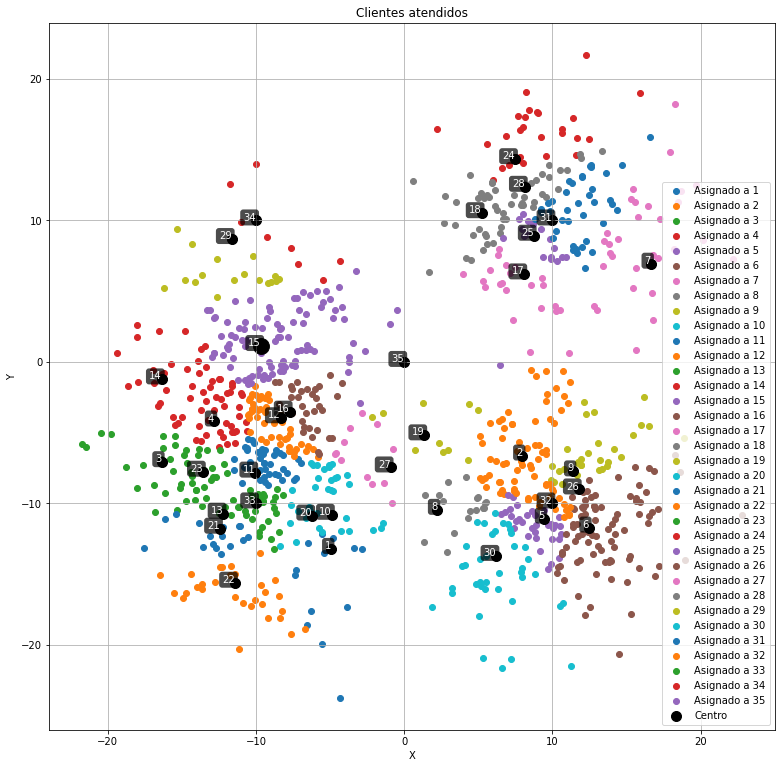

In [25]:

#GRAFICAMOS 

plt.figure(figsize=(13, 13))

for idx in range(len(centros_j)):
    subset = subsets[f'sub{idx}']
    
    plt.scatter(subset['x'], subset['y'], label=f'Asignado a {centros_j[idx]}')


plt.scatter(sub_centros['x'], sub_centros['y'], color='black', s=100, label=f'Centro')



for idx in sub_centros.index:
    if tipos_centros.loc[idx, 'tamaño'] == 'pequeño':
        plt.scatter(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], color='black', s=80)
        plt.text(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], f'{idx}', 
                 fontsize=10, ha='right', color='white', 
                 bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))
    elif tipos_centros.loc[idx, 'tamaño'] == "mediano":
        plt.scatter(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], color='black', s=250)
        plt.text(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], f'{idx}', 
                 fontsize=10, ha='right', color='white', 
                 bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))
    elif tipos_centros.loc[idx, 'tamaño'] == "grande":
        plt.scatter(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], color='black', s=300)
        plt.text(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], f'{idx}', 
                 fontsize=10, ha='right', color='white', 
                 bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))



plt.title(f'Clientes atendidos')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
    

plt.show()

In [77]:
porcentaje = ((problema2b.ObjVal-problema2.ObjVal)/problema2.ObjVal)*100
print(f'En el problema b) los costos disminuyen en un {abs(porcentaje)}%, pasando de ${problema2.ObjVal} a ${problema2b.ObjVal}')
porcentaje = ((problema2b.ObjVal-costos_conins)/costos_conins)*100
print(f'Si incluimos los costos de instalación en el problema a), los costos disminuyen en un {abs(porcentaje)}%, pasando de ${costos_conins} a ${problema2b.ObjVal}')

En el problema b) los costos disminuyen en un 71.39004756275445%, pasando de $4400097.33855695 a $1258865.7557536508
Si incluimos los costos de instalación en el problema a), los costos disminuyen en un 71.41213769493982%, pasando de $4403497.33855695 a $1258865.7557536508


## c)

### Parámetros: 

$$ C_{ij} \quad \text{es el costo de transportar un producto desde el centro} j \text{ al cliente } i \text{ (calculado usando distancia cuadrática y \$1 por km.)} $$
$$ d_{i} \quad \text{es la demanda del cliente } i \text{ en cantidad de productos }$$
$$ a_{j} \quad \text{es la coordenada x del centro } j $$
$$ b_{j} \quad \text{es la coordenada y del centro } j $$

### Variables de decisión:
$$ x_{ij} \quad \text{es el porcentaje de la demanda del cliente } i \text{ que es satisfecha por el centro } j. $$
$$ p_{j} \quad \text{es 1 si el centro } j \text{ es pequeño y 0 si no} $$
$$ m_{j} \quad \text{es 1 si el centro } j \text{ es mediano y 0 si no} $$
$$ g_{j} \quad \text{es 1 si el centro } j \text{ es grande y 0 si no} $$

### Modelo:

$$
min  \left(\sum_{j=1}^m\ ( \sum_{i=1}^n\ C_ij * d_i * x_ij ) + 200*p_j +450*m_j + 850*g_j  \right) \\
$$

s.a.

$$
\sum_{j \in M} x_{ij} = 1 \quad \forall i \in N
$$
*Se debe satisfacer toda la demanda del cliente.*

$$
x_{ij} \leq p_j + m_j + g_j \quad \forall (i,j) \in N \times M
$$
*Un cliente solo puede ser asignado a un centro si el centro está abierto. (puede omitirse ya que se incluye en la restricción siguiente)*

$$
\sum_{i \in N} d_i \cdot x_{ij} \leq  10000 \cdot p_j + 25000 \cdot m_j + 50000 \cdot g_j\quad \forall j \in M
$$
*La demanda total asignada a un centro no debe exceder su capacidad.*

$$
\sum_{j \in M} y_j = 4
$$
*Debe haber exactamente 4 centros abiertos.*

$$
x_{ij} \leq 1 \quad \forall (i,j) \in N \times M
$$
*Garantiza que $x_{ij}$ no sea mayor a 1 ya que es un porcentaje.*

### Restricciones agregadas:

$$
a_j \leq -1
$$
$$
a_j \geq 11
$$
*No se pueden construir centros en la reserva natural (coordenadas x)*

$$
b_j \leq -5
$$
$$
b_j \geq 10
$$
*No se pueden construir centros en la reserva natural (coordenadas y)*

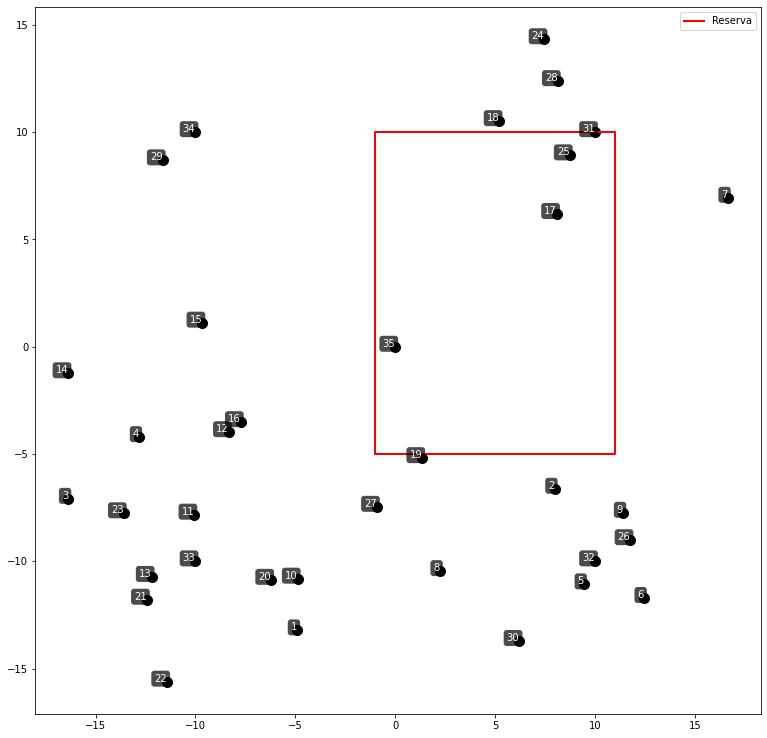

In [26]:

### PRIMERO VISUALIZAMOS LA RESTRICCIÓN
plt.figure(figsize=(13, 13))

for idx in data_centros.index:
    plt.scatter(data_centros.loc[idx, 'x'], data_centros.loc[idx, 'y'], color='black', s=100)
    plt.text(data_centros.loc[idx, 'x'], data_centros.loc[idx, 'y'], f'{idx}', fontsize=10, ha='right', color='white',
         bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

# Coordenadas de los vértices del rectángulo
rect_x = [-1, -1, 11, 11, -1]  
rect_y = [-5, 10, 10, -5, -5]

plt.plot(rect_x, rect_y, 'r-', linewidth=2, label='Reserva')
#plt.grid(True)
plt.legend()

plt.show()

In [27]:
conjunto_N= [i for i in valores_N]
conjunto_M = [j for j in valores_M]
indices = [(i,j) for i in valores_N for j in valores_M]


problema2c = Model("problema 2c")

#Variables de decisión
x_ij = problema2c.addVars(indices, vtype= GRB.CONTINUOUS, name = "x_ij") #porcentaje en el que el cliente i se atiende en el centro j
p_j = problema2c.addVars(conjunto_M, vtype= GRB.BINARY, name = "p_j") #1 si el centro j se construye y es chico, 0 si no
m_j = problema2c.addVars(conjunto_M, vtype= GRB.BINARY, name = "m_j") #1 si el centro j se construye y es mediano, 0 si no
g_j = problema2c.addVars(conjunto_M, vtype= GRB.BINARY, name = "g_j") #1 si el centro j se construye y es grande, 0 si no

#Función objetivo
problema2c.setObjective(quicksum(matriz_c[i-1, j-1]*matriz_d[0,i-1]*x_ij[i,j] for (i,j) in indices) + quicksum((200*p_j[j])+(450*m_j[j])+(850*g_j[j]) for j in conjunto_M), GRB.MINIMIZE)  

#Restricciones

c_reserva=[]
for j in conjunto_M:
    if data_centros.iloc[j-1,0] >= -1 and data_centros.iloc[j-1,0] <=11 :
        if data_centros.iloc[j-1,1] >= -5 and data_centros.iloc[j-1,1] <= 10:
            c_reserva.append(j)
            print(j)

# Obligamos a que no se construya el centro (la variable sea 0) si es que se encuentra dentro de la reserva
problema2c.addConstrs(p_j[j]== 0 for j in c_reserva)
problema2c.addConstrs(m_j[j]== 0 for j in c_reserva)
problema2c.addConstrs(g_j[j]== 0 for j in c_reserva)


problema2c.addConstrs(quicksum(x_ij[i,j] for j in conjunto_M) == 1 for i in conjunto_N) #un centro para cada cliente  #PREGUNTAR SI UN CLIENTE TIENE 1 INSTALACIÓN O SI ES POR PORCENTAJE
problema2c.addConstrs(p_j[j] + m_j[j] + g_j[j] <= 1 for j in conjunto_M) #el centro puede ser o pequeño o mediano o grande (solo 1)
problema2c.addConstrs(x_ij[i,j] <= (p_j[j] + m_j[j] + g_j[j]) for (i,j) in indices)  #si no se hace el centro no se asigna cliente (creo que es redundante)
problema2c.addConstrs(quicksum(matriz_d[0,i-1]*x_ij[i,j] for i in conjunto_N) <= 10000*p_j[j] + 25000*m_j[j] + 50000*g_j[j] for j in conjunto_M)  #suma de demandas menor a la capacidad del centro j
problema2c.addConstrs(x_ij[i,j]<=1 for (i,j) in indices) #el porcentaje de atención es menor o igual a 1 (es un porcentaje)

problema2c.optimize()

17
25
31
35
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[rosetta2] - Darwin 23.6.0 23G93)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 71082 rows, 35105 columns and 245222 nonzeros
Model fingerprint: 0x1dd65840
Variable types: 35000 continuous, 105 integer (105 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+04]
  Objective range  [2e+00, 3e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 39020 rows and 4012 columns
Presolve time: 0.12s
Presolved: 32062 rows, 31093 columns, 186186 nonzeros
Variable types: 31000 continuous, 93 integer (93 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing primal log only...

Concurrent spin time: 0.01s

Solved with dual simplex

Root relaxation: objective 1.479463e+06, 80 iterations, 0.07 seconds (0.07 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work


In [69]:
print(f"los costos mínimos totales son {problema2c.ObjVal}")

m = len(data_centros)

vars = problema2c.getVars()

vars_x=[]
vars_p=[]
vars_m=[]
vars_g=[]

for var in vars:
    if var.VarName.startswith("x_"):
        vars_x.append(var)
    elif var.VarName.startswith("p_"):
        vars_p.append(var)
    elif var.VarName.startswith("m_"):
        vars_m.append(var)
    elif var.VarName.startswith("g_"):
        vars_g.append(var)

variables_activas_x = [var for var in vars_x if var.x != 0]
variables_activas_p = [var for var in vars_p if var.x != 0]
variables_activas_m = [var for var in vars_m if var.x != 0]
variables_activas_g = [var for var in vars_g if var.x != 0]

los costos mínimos totales son 1479683.6435593043


In [70]:
#Estos clientes no cumplen su demanda en un solo centro, sino que un porcentaje en cada uno
clientes_parciales = [var for var in vars_x if var.x != 0 and var.x != 1]
clientes_parciales

[<gurobi.Var x_ij[459,6] (value 0.5386718608848883)>,
 <gurobi.Var x_ij[459,26] (value 0.4613281391151117)>,
 <gurobi.Var x_ij[588,24] (value 0.5681342041825972)>,
 <gurobi.Var x_ij[588,28] (value 0.4318657958174028)>]

In [71]:

clientes_por_centro = defaultdict(list)
centros_j = set()

for var in variables_activas_x:
    var_name = var.VarName  # Obtiene el nombre de la variable
    # Extraer los índices i y j
    indices = var_name.split('[')[1].split(']')[0]  # Ejemplo: "1,5"
    i, j = map(int, indices.split(','))  # Divide "1,5" en [1, 5]
    
    # Agrupar i por j
    clientes_por_centro[j].append(i)
    centros_j.add(j)

centros_j = sorted(centros_j)

# Mostrar los resultados ordenados por el centro j
for j in sorted(clientes_por_centro):
    clientes = sorted(clientes_por_centro[j])  # Ordenar los clientes también
    coordenada_x = data_centros.loc[j, 'x']
    coordenada_y = data_centros.loc[j, 'y']
    print(f"En el centro {j} ubicado en ({coordenada_x}, {coordenada_y}) se atienden los clientes: {clientes}")


En el centro 1 ubicado en (-4.9089, -13.2162) se atienden los clientes: [22, 120, 165, 181, 221, 307, 312, 319, 389, 622, 656, 755, 929, 934]
En el centro 2 ubicado en (7.9829, -6.6164) se atienden los clientes: [10, 17, 59, 86, 87, 96, 107, 116, 124, 136, 159, 184, 190, 202, 208, 214, 228, 244, 340, 345, 372, 391, 400, 401, 411, 427, 445, 463, 475, 480, 481, 484, 488, 497, 499, 532, 556, 565, 566, 572, 584, 585, 587, 594, 596, 604, 628, 661, 664, 682, 757, 766, 796, 816, 831, 834, 866, 880, 927, 942, 964, 994]
En el centro 3 ubicado en (-16.3669, -7.0845) se atienden los clientes: [75, 141, 158, 160, 225, 245, 298, 324, 349, 360, 433, 471, 492, 519, 610, 662, 722, 808, 962, 966]
En el centro 4 ubicado en (-12.8194, -4.2092) se atienden los clientes: [2, 66, 127, 134, 215, 248, 259, 268, 305, 395, 409, 439, 449, 451, 487, 512, 545, 576, 591, 597, 618, 659, 663, 667, 689, 694, 701, 710, 724, 734, 779, 784, 815, 871, 911, 916, 939, 952, 981, 997]
En el centro 5 ubicado en (9.4519, -11.07

In [72]:
#### ESTE ARREGLO SOLO ES PARA GRAFICAR MÁS FÁCILMENTE ####
subsets = {}

indices_centros = [i - 1 for i in centros_j]
sub_centros = data_centros.iloc[indices_centros]

for idx, j in enumerate(centros_j):
    indices = [i - 1 for i in clientes_por_centro[j]] #para tener sus índices en el dataframe (formato que inicia en 0)
    
    subset = data_clientes.iloc[indices] #subset con coordenadas para graficar 
    
    subsets[f'sub{idx}'] = subset #guardamos en diccionario para acceder más fácilmente

####                                                   ####

cant_centros= len(variables_activas_p)+len(variables_activas_m)+len(variables_activas_g)
tipos_centros = pd.DataFrame(index=range(cant_centros), columns=['tamaño'])


centrosp = {int(var.VarName.split('[')[1].split(']')[0]) for var in variables_activas_p}
centrosm = {int(var.VarName.split('[')[1].split(']')[0]) for var in variables_activas_m}
centrosg = {int(var.VarName.split('[')[1].split(']')[0]) for var in variables_activas_g}


for idx, centro in enumerate(centros_j):
    if centro in centrosp:
        tipos_centros.loc[idx, 'tamaño'] = 'pequeño'
    elif centro in centrosm:
        tipos_centros.loc[idx, 'tamaño'] = 'mediano'
    elif centro in centrosg:
        tipos_centros.loc[idx, 'tamaño'] = 'grande'

tipos_centros.index = sub_centros.index

for idx in tipos_centros.index:
    print(f'El centro {idx} es de tamaño {tipos_centros.loc[idx, "tamaño"]}')

El centro 1 es de tamaño pequeño
El centro 2 es de tamaño pequeño
El centro 3 es de tamaño pequeño
El centro 4 es de tamaño pequeño
El centro 5 es de tamaño pequeño
El centro 6 es de tamaño pequeño
El centro 7 es de tamaño pequeño
El centro 8 es de tamaño pequeño
El centro 9 es de tamaño pequeño
El centro 10 es de tamaño pequeño
El centro 11 es de tamaño pequeño
El centro 12 es de tamaño pequeño
El centro 13 es de tamaño pequeño
El centro 14 es de tamaño pequeño
El centro 15 es de tamaño mediano
El centro 16 es de tamaño pequeño
El centro 18 es de tamaño pequeño
El centro 19 es de tamaño pequeño
El centro 20 es de tamaño pequeño
El centro 21 es de tamaño pequeño
El centro 22 es de tamaño pequeño
El centro 23 es de tamaño pequeño
El centro 24 es de tamaño pequeño
El centro 26 es de tamaño pequeño
El centro 27 es de tamaño pequeño
El centro 28 es de tamaño pequeño
El centro 29 es de tamaño pequeño
El centro 30 es de tamaño pequeño
El centro 32 es de tamaño pequeño
El centro 33 es de tama

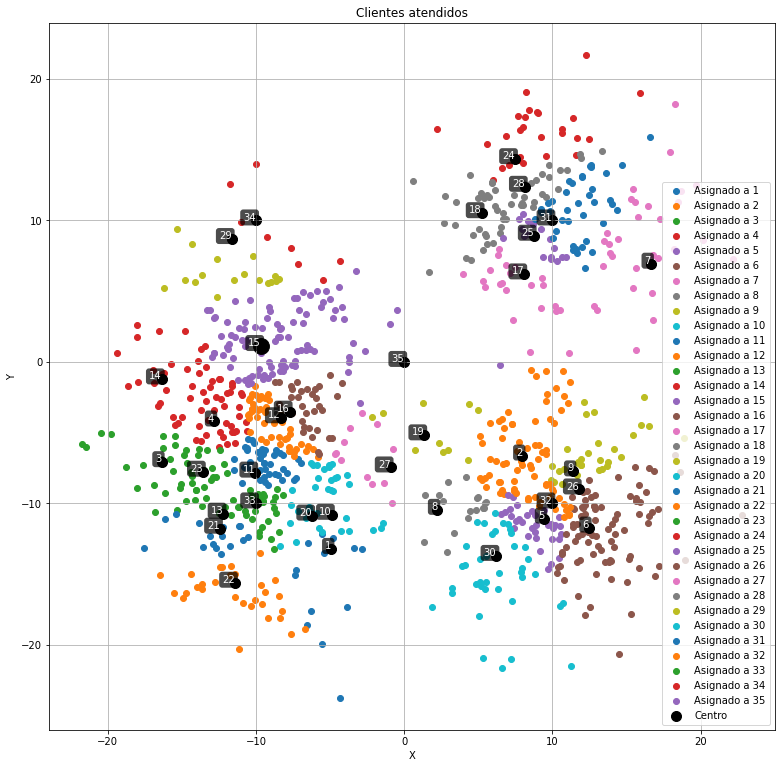

In [51]:

plt.figure(figsize=(13, 13))

for idx in range(len(centros_j)):
    subset = subsets[f'sub{idx}']
    
    plt.scatter(subset['x'], subset['y'], label=f'Asignado a {centros_j[idx]}')


plt.scatter(sub_centros['x'], sub_centros['y'], color='black', s=100, label=f'Centro')



for idx in sub_centros.index:
    if tipos_centros.loc[idx, 'tamaño'] == 'pequeño':
        plt.scatter(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], color='black', s=80)
        plt.text(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], f'{idx}', 
                 fontsize=10, ha='right', color='white', 
                 bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))
    elif tipos_centros.loc[idx, 'tamaño'] == "mediano":
        plt.scatter(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], color='black', s=250)
        plt.text(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], f'{idx}', 
                 fontsize=10, ha='right', color='white', 
                 bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))
    elif tipos_centros.loc[idx, 'tamaño'] == "grande":
        plt.scatter(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], color='black', s=300)
        plt.text(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], f'{idx}', 
                 fontsize=10, ha='right', color='white', 
                 bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))


plt.title(f'Clientes atendidos')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
    

plt.show()

In [75]:
porcentaje = ((problema2c.ObjVal-problema2b.ObjVal)/problema2b.ObjVal)*100
print(f'En el problema c) los costos aumentan en un {abs(porcentaje)}% comparando con la solución b), pasando de ${problema2b.ObjVal} a ${problema2c.ObjVal}')

En el problema c) los costos aumentan en un 17.541019508744636% comparando con la solución b), pasando de $1258865.7557536508 a $1479683.6435593043


# Problema 3

Problema 3.a


Se quiere minimizar la distancia entre ubicaciones en un espacio bidimensional. La distancia entre el centro de la habitación hacia los puestos de los operadores se define como:
$$
min  \sum_{i=1}^n\ d((x,y),(a_{i},b_{i}))\\
$$
Donde d representa el calculo de la distancia desde el punto centro (x,y) y cada uno de los puestos operadores con coordenadas (a_i,b_i)
$$
\text{s.t.}\\
2 \leq a_i \leq 10,\quad 2 \leq b_i \leq 8 \quad \forall i 
$$
Ninguna ubicación puede quedar a menos de dos metros de las paredes
$$
d((a_i, b_i), (a_j, b_j)) \geq 3 \quad \forall i \neq j
$$
La distancia entre cualquiera de las estaciones debe ser al menos de 3 metros

Pregunta 3b.1\
\
Método centro de gravedad (distancia euclidiana)
$$
min  \left(\sum_{i=1}^n\ d(x, y), (a_i, b_i) \right) = \sqrt{(x - a_i)^2 + (y - b_i)^2}\\
$$
$$
\text{s.t.}\\
2 \leq a_i \leq 10,\quad 2 \leq b_i \leq 8 \quad \forall i
$$
$$
\sqrt{(x_i - a_i)^2 + (y_i - b_i)^2} \geq 3, \quad \forall i \neq j
$$


In [33]:
#distancia euclidiana, hay que corregir
import gurobipy as gp
from gurobipy import GRB

def optimize_euclidean(center=(6, 5), n_stations=4):
    """
    Optimiza la ubicación de las estaciones de trabajo minimizando la suma de la distancia
    euclidiana al centro y cumpliendo con las restricciones especificadas.
    """
    # Crear un nuevo modelo
    model = gp.Model("optimize_workstations_euclidean")
    
    # Variables de decisión: coordenadas de las estaciones
    coords = []
    distances_squared = []
    for i in range(n_stations):
        ai = model.addVar(vtype=GRB.CONTINUOUS, lb=2, ub=10, name=f"a_{i+1}")
        bi = model.addVar(vtype=GRB.CONTINUOUS, lb=2, ub=8, name=f"b_{i+1}")
        dist_sq = model.addVar(vtype=GRB.CONTINUOUS, name=f"dist_sq_{i+1}")
        model.addConstr(dist_sq == (ai - center[0])**2 + (bi - center[1])**2)
        coords.append((ai, bi))
        distances_squared.append(dist_sq)
    
    # Función objetivo: minimizar la suma de las distancias euclidianas al cuadrado al centro (6, 5)
    # Minimizar la suma de las distancias al cuadrado es equivalente en este contexto.
    model.setObjective(gp.quicksum(distances_squared), GRB.MINIMIZE)
    
    # Restricción: la distancia mínima entre estaciones debe ser al menos 3 unidades
    for i in range(n_stations):
        for j in range(i + 1, n_stations):
            ai, bi = coords[i]
            aj, bj = coords[j]
            model.addConstr((ai - aj)**2 + (bi - bj)**2 >= 9, name=f"DistanciaMin_{i+1}_{j+1}")
    
    # optimización
    model.optimize()
    
    # Mostrar resultados
    if model.status == GRB.OPTIMAL:
        print("Optimización completada:")
        for i, (ai, bi) in enumerate(coords):
            dist_value_squared = model.getVarByName(f"dist_sq_{i+1}").X
            dist_value = dist_value_squared**0.5  # Calculamos la raíz cuadrada para obtener la distancia real
            print(f"Estación {i+1}: ({ai.X:.2f}, {bi.X:.2f}) - Distancia al centro: {dist_value:.2f} unidades")
    else:
        print("No se encontró una solución óptima")

# Llamar a la función para optimizar las ubicaciones de las estaciones de trabajo
optimize_euclidean()


Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[rosetta2] - Darwin 23.6.0 23G93)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 12 columns and 0 nonzeros
Model fingerprint: 0xeee12587
Model has 10 quadratic constraints
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  QMatrix range    [1e+00, 2e+00]
  QLMatrix range   [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [2e+00, 1e+01]
  RHS range        [0e+00, 0e+00]
  QRHS range       [9e+00, 6e+01]

Continuous model is non-convex -- solving as a MIP

Presolve time: 0.00s
Presolved: 58 rows, 32 columns, 176 nonzeros
Presolved model has 20 bilinear constraint(s)
Variable types: 32 continuous, 0 integer (0 binary)

Root relaxation: objective 0.000000e+00, 20 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Be

# Distancia Euclidiana

Coordenadas óptimas para los 4 puntos:
Punto 1: (x, y) = (8.0200, 3.3660)
Punto 2: (x, y) = (3.9803, 6.6342)
Punto 3: (x, y) = (5.0568, 3.8339)
Punto 4: (x, y) = (6.9436, 6.1663)
Valor de la función objetivo (distancia total): 8.19615222629894


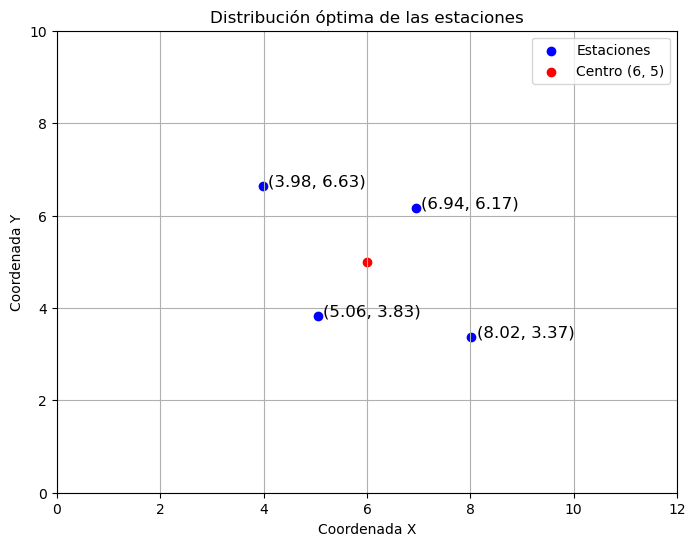

In [3]:
#Distancia euclidiana
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.spatial.distance import cdist

# Función objetivo: Minimizar la suma de las distancias euclidianas al centro (6, 5)
def objective(x):
    # x es un vector de tamaño 8, representando las coordenadas de las 4 estaciones
    stations = x.reshape(4, 2)
    # Calcular las distancias al centro (6, 5)
    distances = np.sqrt((stations[:, 0] - 6)**2 + (stations[:, 1] - 5)**2)
    return np.sum(distances)

# Restricción 1: Límites de las coordenadas
def constraint1(x):
    stations = x.reshape(4, 2)
    # Verificar que las coordenadas estén dentro de los límites [2, 10] para x y [2, 8] para y
    return np.array([np.min(stations, axis=0) - [2, 2], [10, 8] - np.max(stations, axis=0)]).flatten()

# Restricción 2: Distancia mínima entre estaciones
def constraint2(x):
    stations = x.reshape(4, 2)
    distances_between_stations = cdist(stations, stations)
    np.fill_diagonal(distances_between_stations, np.inf)  # Ignorar la distancia de una estación a sí misma
    return np.min(distances_between_stations) - 3  # Las estaciones deben estar al menos a 3 metros de distancia

# Condiciones iniciales
x0 = np.random.uniform(2, 10, size=8)

# Definir las restricciones
cons = (
    {'type': 'ineq', 'fun': constraint1},  # Límites en las coordenadas
    {'type': 'ineq', 'fun': constraint2}   # Distancia mínima entre estaciones
)

# Resolver el problema de optimización
sol = minimize(objective, x0, method='SLSQP', constraints=cons, bounds=[(2, 10), (2, 8)]*4)

# Obtener las coordenadas óptimas
#optimal_stations = sol.x.reshape(4, 2)
#print("Coordenadas óptimas de las estaciones:")
#print(optimal_stations)
#print(sol.fun)

ubicaciones_optimas = sol.x.reshape((4, 2))
print("Coordenadas óptimas para los 4 puntos:")
for i, punto in enumerate(ubicaciones_optimas, start=1):
    print(f"Punto {i}: (x, y) = ({punto[0]:.4f}, {punto[1]:.4f})")
print("Valor de la función objetivo (distancia total):", sol.fun)
    
center = [6, 5]
    
# Crear la figura
plt.figure(figsize=(8, 6))
    
# Graficar las estaciones
plt.scatter(ubicaciones_optimas[:, 0], ubicaciones_optimas[:, 1], color='blue', label='Estaciones')

# Graficar el centro de gravedad
plt.scatter(center[0], center[1], color='red', label='Centro (6, 5)')

# Límites del gráfico
plt.xlim(0, 12)
plt.ylim(0, 10)

# Añadir etiquetas y título
plt.title('Distribución óptima de las estaciones')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Añadir etiquetas a las estaciones junto con las coordenadas
for i, (x, y) in enumerate(ubicaciones_optimas):
    plt.text(x + 0.1, y, f'({x:.2f}, {y:.2f})', fontsize=12, color='black')

# Mostrar la leyenda
plt.legend()

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar gráfico
plt.show()

# Distancia Manhattan

Coordenadas óptimas para los 4 puntos:
Punto 1: (x, y) = (6.0000, 3.5000)
Punto 2: (x, y) = (4.5000, 5.0000)
Punto 3: (x, y) = (7.5000, 5.0000)
Punto 4: (x, y) = (6.0000, 6.5000)
Valor de la función objetivo (distancia total): 6.00004361527968


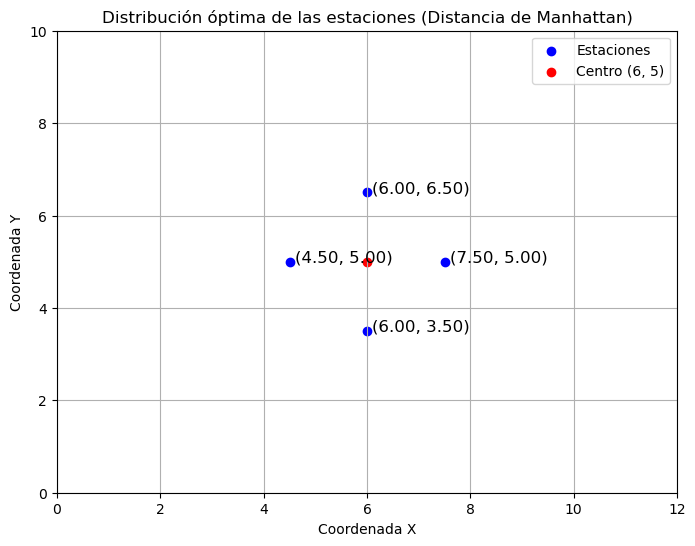

In [34]:
import numpy as np
from scipy.optimize import minimize
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# Función objetivo: Minimizar la suma de las distancias de Manhattan al centro (6, 5)
def objective(x):
    # x es un vector de tamaño 8, representando las coordenadas de las 4 estaciones
    stations = x.reshape(4, 2)
    # Calcular las distancias de Manhattan al centro (6, 5)
    distances = np.abs(stations[:, 0] - 6) + np.abs(stations[:, 1] - 5)
    return np.sum(distances)

# Restricción 1: Límites de las coordenadas
def constraint1(x):
    stations = x.reshape(4, 2)
    # Verificar que las coordenadas estén dentro de los límites [2, 10] para x y [2, 8] para y
    return np.array([np.min(stations, axis=0) - [2, 2], [10, 8] - np.max(stations, axis=0)]).flatten()

# Restricción 2: Distancia mínima de Manhattan entre estaciones
def constraint2(x):
    stations = x.reshape(4, 2)
    # Calcular la matriz de distancias de Manhattan entre estaciones
    distances_between_stations = cdist(stations, stations, metric='cityblock') #cityblock es lo mismo que manhattan
    np.fill_diagonal(distances_between_stations, np.inf)  # Ignorar la distancia de una estación a sí misma
    return np.min(distances_between_stations) - 3  # Las estaciones deben estar al menos a 3 metros de distancia

# Condiciones iniciales
x0 = np.random.uniform(2, 10, size=8)

# Definir las restricciones
cons = (
    {'type': 'ineq', 'fun': constraint1},  # Límites en las coordenadas
    {'type': 'ineq', 'fun': constraint2}   # Distancia mínima entre estaciones
)

# Resolver el problema de optimización
sol = minimize(objective, x0, method='SLSQP', constraints=cons, bounds=[(2, 10), (2, 8)]*4)

# Obtener las coordenadas óptimas
ubicaciones_optimas = sol.x.reshape((4, 2))
print("Coordenadas óptimas para los 4 puntos:")
for i, punto in enumerate(ubicaciones_optimas, start=1):
    print(f"Punto {i}: (x, y) = ({punto[0]:.4f}, {punto[1]:.4f})")
print("Valor de la función objetivo (distancia total):", sol.fun)
    
center = [6, 5]

# Crear la figura
plt.figure(figsize=(8, 6))
    
# Graficar las estaciones
plt.scatter(ubicaciones_optimas[:, 0], ubicaciones_optimas[:, 1], color='blue', label='Estaciones')

# Graficar el centro de gravedad
plt.scatter(center[0], center[1], color='red', label='Centro (6, 5)')

# Límites del gráfico
plt.xlim(0, 12)
plt.ylim(0, 10)

# Añadir etiquetas y título
plt.title('Distribución óptima de las estaciones (Distancia de Manhattan)')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Añadir etiquetas a las estaciones junto con las coordenadas
for i, (x, y) in enumerate(ubicaciones_optimas):
    plt.text(x + 0.1, y, f'({x:.2f}, {y:.2f})', fontsize=12, color='black')

# Mostrar la leyenda
plt.legend()

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar gráfico
plt.show()

# Distancia Cuadrática 

Punto 1: (x, y) = (6.6090, 3.8465)
Punto 2: (x, y) = (4.9923, 4.4680)
Punto 3: (x, y) = (7.0077, 5.5321)
Punto 4: (x, y) = (5.3910, 6.1535)
Valor de la función objetivo (distancia total): 6.000000069040199


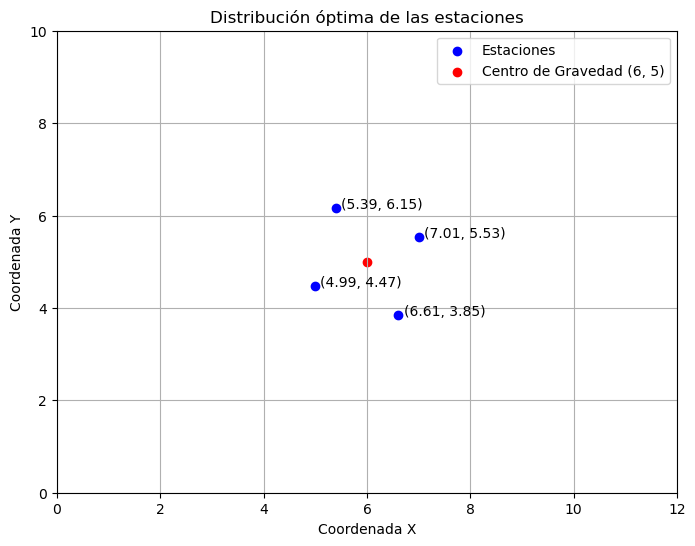

In [30]:
#Distancia Cuadratica
from scipy.optimize import minimize
import numpy as np

# Definir el centro de la región
centro = np.array([6, 5])

# Función objetivo: minimiza la suma de las distancias desde las 4 estaciones al centro
def funcion_objetivo(ubicaciones):
    ubicaciones = ubicaciones.reshape((4, 2))  # Convertir el vector de 8 elementos en 4 pares de coordenadas
    distancia_total = 0
    for estacion in ubicaciones:
        # Suma la distancia euclidiana de cada estación al centro
        distancia_total += (estacion[0] - centro[0])**2 + (estacion[1] - centro[1])**2
    return distancia_total

# Restricción: ninguna estación puede estar a menos de 2 metros de las paredes
def restriccion_paredes(ubicaciones):
    ubicaciones = ubicaciones.reshape((4, 2))
    dist_paredes = []
    for estacion in ubicaciones:
        # Restricción para cada eje (x: [2, 10], y: [2, 8])
        dist_paredes.append(estacion[0] - 2)    # distancia al borde izquierdo
        dist_paredes.append(10 - estacion[0])   # distancia al borde derecho
        dist_paredes.append(estacion[1] - 2)    # distancia al borde inferior
        dist_paredes.append(8 - estacion[1])    # distancia al borde superior
    return np.array(dist_paredes)

# Restricción: distancia mínima entre estaciones debe ser de al menos 3 metros
def restriccion_distancia_minima(ubicaciones):
    ubicaciones = ubicaciones.reshape((4, 2))
    dist_minima = []
    for i in range(len(ubicaciones)):
        for j in range(i + 1, len(ubicaciones)):
            # Calcular la distancia entre cada par de estaciones
            dist_ij = (ubicaciones[i][0] - ubicaciones[j][0])**2 + (ubicaciones[i][1] - ubicaciones[j][1])**2
            dist_minima.append(dist_ij - 3)  # distancia debe ser mayor o igual a 3
    return np.array(dist_minima)

# Restricción: ninguna estación puede estar en el centro
def restriccion_centro(ubicaciones):
    ubicaciones = ubicaciones.reshape((4, 2))
    dist_centro = []
    for estacion in ubicaciones:
        # Asegurarse de que la estación no esté exactamente en el centro
        dist_centro.append(np.linalg.norm(estacion - centro) - 0.1)  # evitar que esté exactamente en el centro
    return np.array(dist_centro)

# Inicializar ubicaciones iniciales (aleatoriamente dentro de la región)
x_inicial = np.random.uniform(2, 10, size=(8,))  # 4 estaciones con coordenadas x, y

# Definir las restricciones
restricciones = [
    {'type': 'ineq', 'fun': restriccion_paredes},        # distancia mínima a las paredes
    {'type': 'ineq', 'fun': restriccion_distancia_minima}, # distancia mínima entre estaciones
    {'type': 'ineq', 'fun': restriccion_centro}         # evitar el centro
]

# Ejecutar la optimización
resultado = minimize(funcion_objetivo, x_inicial, constraints=restricciones, method='SLSQP')

# Mostrar resultados
if resultado.success:
    ubicaciones_optimas = resultado.x.reshape((4, 2))
    for i, punto in enumerate(ubicaciones_optimas, start=1):
        print(f"Punto {i}: (x, y) = ({punto[0]:.4f}, {punto[1]:.4f})")
    print("Valor de la función objetivo (distancia total):", resultado.fun)
    center = [6, 5]
    
    # Crear la figura
    plt.figure(figsize=(8, 6))
    
    # Graficar las estaciones
    plt.scatter(ubicaciones_optimas[:, 0], ubicaciones_optimas[:, 1], color='blue', label='Estaciones')
    
    # Graficar el centro de gravedad
    plt.scatter(center[0], center[1], color='red', label='Centro de Gravedad (6, 5)')
    
    # Límites del gráfico
    plt.xlim(0, 12)
    plt.ylim(0, 10)
    
    # Añadir etiquetas y título
    plt.title('Distribución óptima de las estaciones')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    
    # Añadir etiquetas a las estaciones junto con las coordenadas
    for i, (x, y) in enumerate(ubicaciones_optimas):
        plt.text(x + 0.1, y, f'({x:.2f}, {y:.2f})', fontsize=10, color='black')
    
    # Mostrar la leyenda
    plt.legend()
    
    # Mostrar la cuadrícula
    plt.grid(True)
    
    # Mostrar gráfico
    plt.show()
else:
    print("La optimización falló:", resultado.message)